## Long term (full experiment) rack cluster charge trends
extract the MPV from the langau fit results (the .npy files created by trackcharge_langau.py or trackcharge_langau_DQMcanvas.py script)
The date information are get from the .npy file created by rundb_list_expertflags.py

PXDER/PXD_Track_Cluster_Charge_1_8_1 46
PXDER/PXD_Track_Cluster_Charge_1_7_1 63
PXDER/PXD_Track_Cluster_Charge_1_7_2 83
PXDER/PXD_Track_Cluster_Charge_2_5_2 108
PXDER/PXD_Track_Cluster_Charge_2_5_1 79
PXDER/PXD_Track_Cluster_Charge_1_6_2 100
PXDER/PXD_Track_Cluster_Charge_2_4_1 66
PXDER/PXD_Track_Cluster_Charge_2_4_2 95
PXDER/PXD_Track_Cluster_Charge_1_3_1 27
PXDER/PXD_Track_Cluster_Charge_1_2_2 62
PXDER/PXD_Track_Cluster_Charge_1_4_1 28
PXDER/PXD_Track_Cluster_Charge_1_1_1 51


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


PXDER/PXD_Track_Cluster_Charge_1_5_2 78
PXDER/PXD_Track_Cluster_Charge_1_2_1 27
PXDER/PXD_Track_Cluster_Charge_1_1_2 55
PXDER/PXD_Track_Cluster_Charge_1_8_2 78
PXDER/PXD_Track_Cluster_Charge_1_6_1 69
PXDER/PXD_Track_Cluster_Charge_1_5_1 34
PXDER/PXD_Track_Cluster_Charge_1_4_2 90


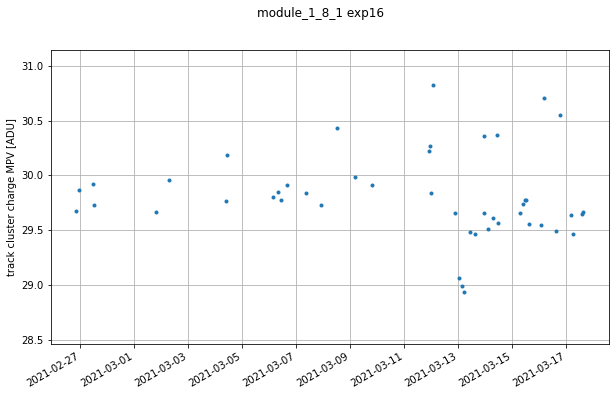

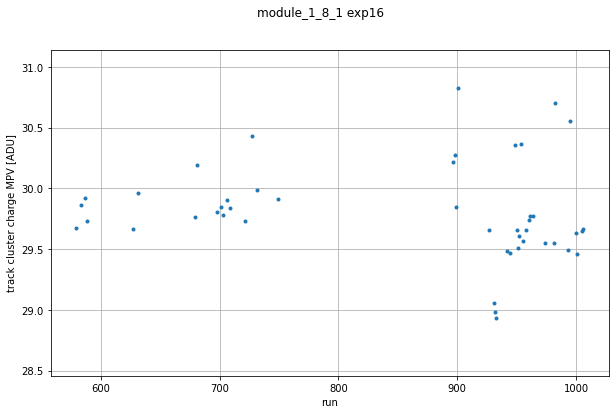

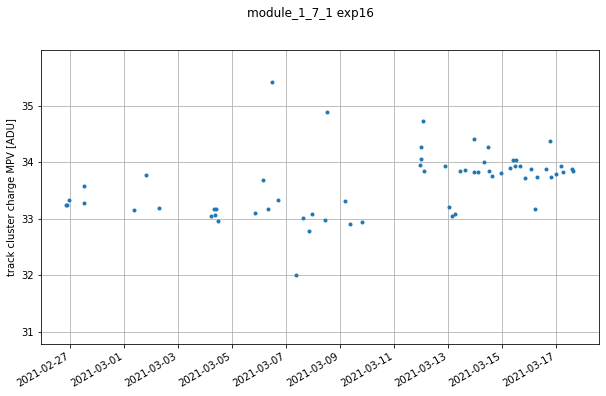

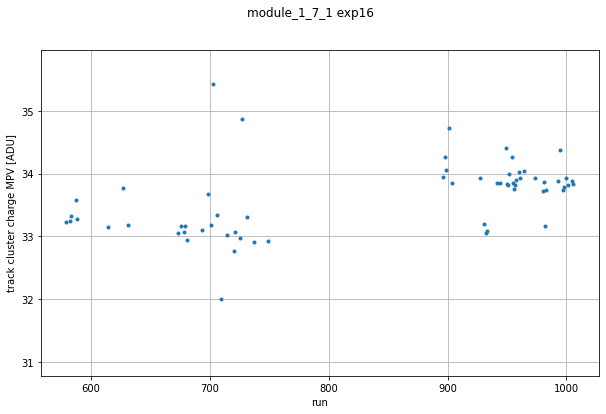

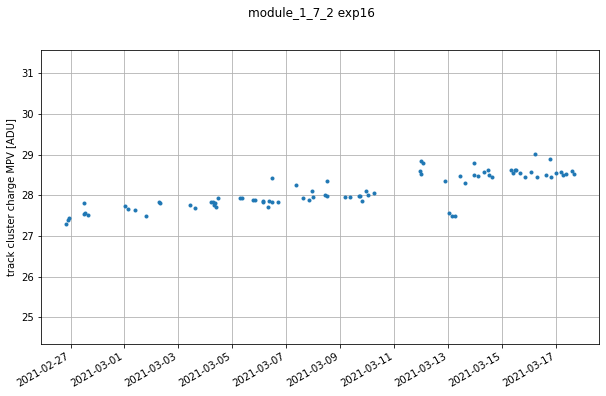

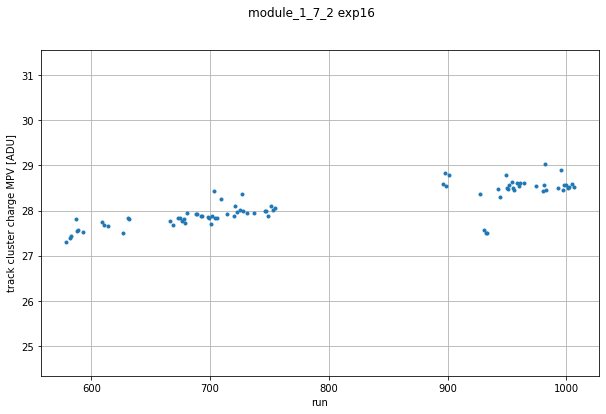

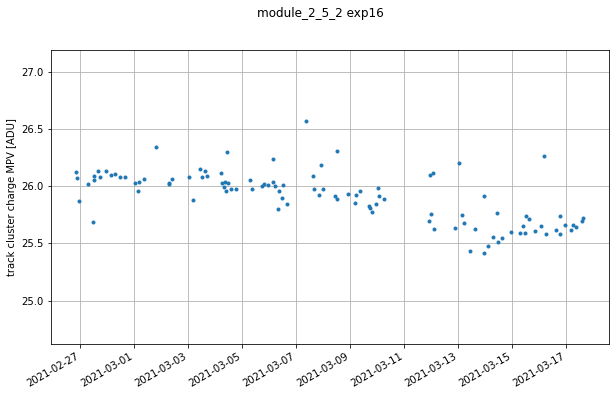

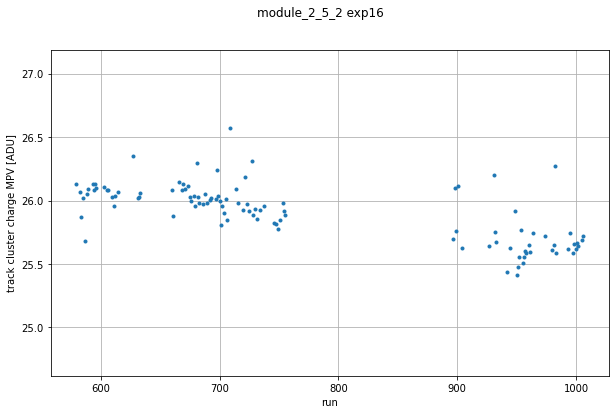

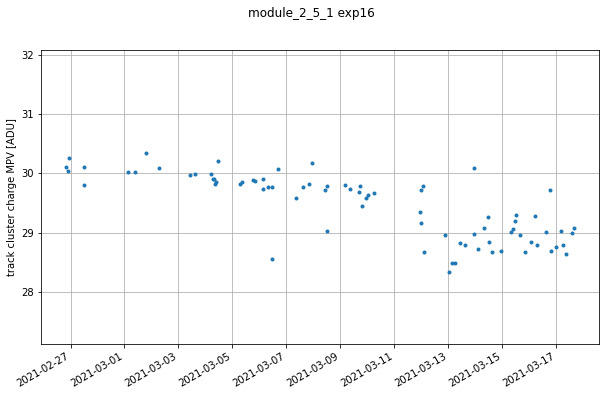

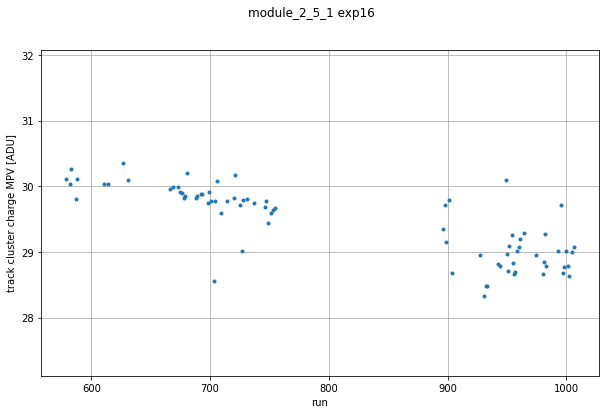

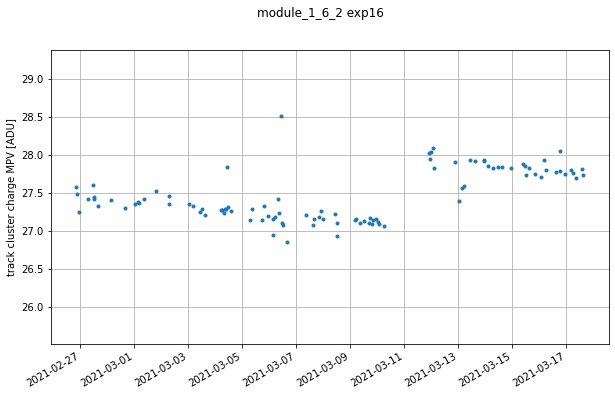

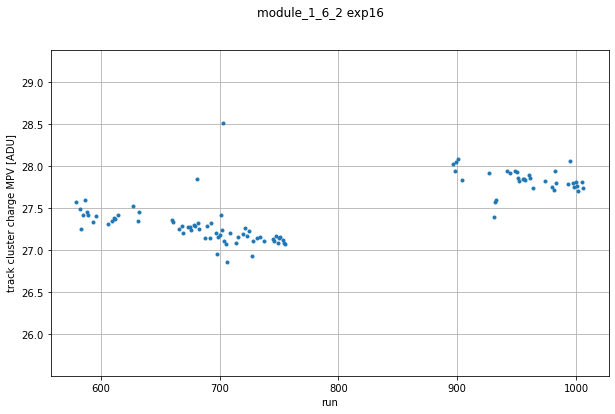

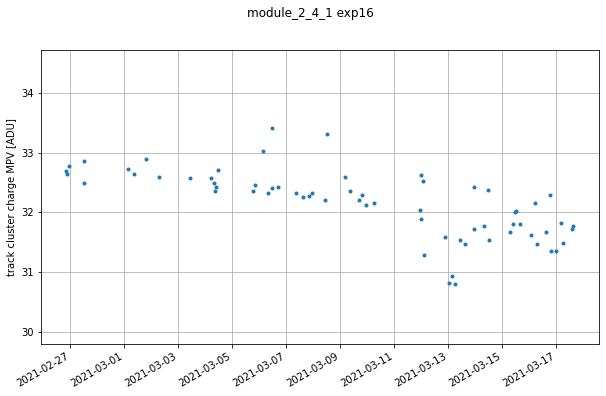

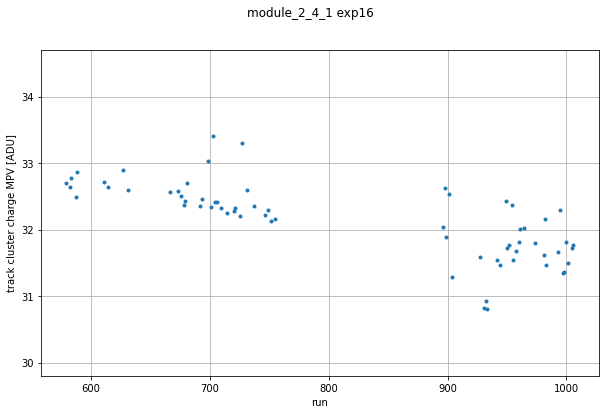

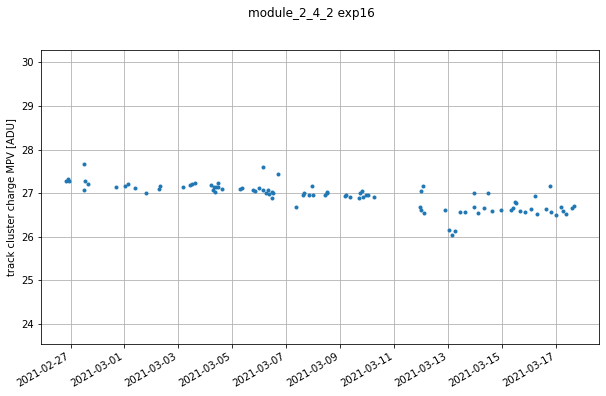

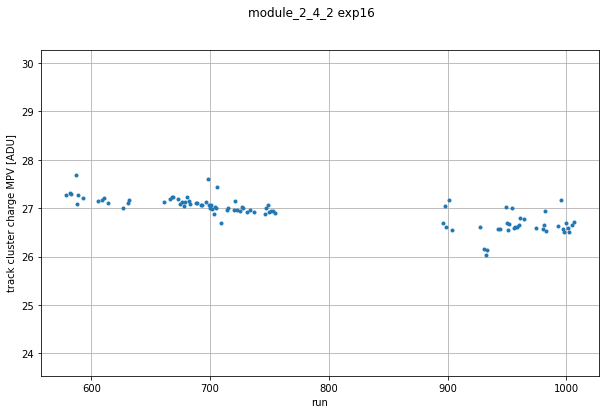

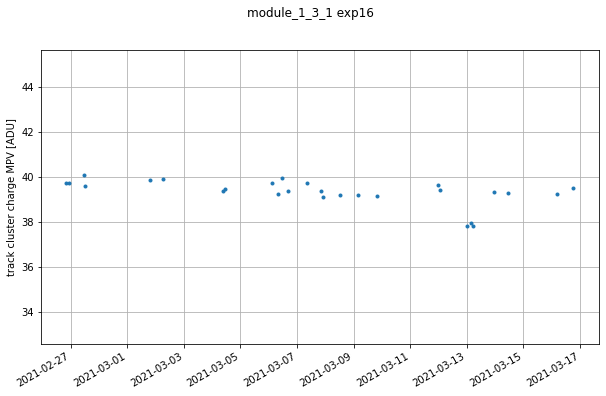

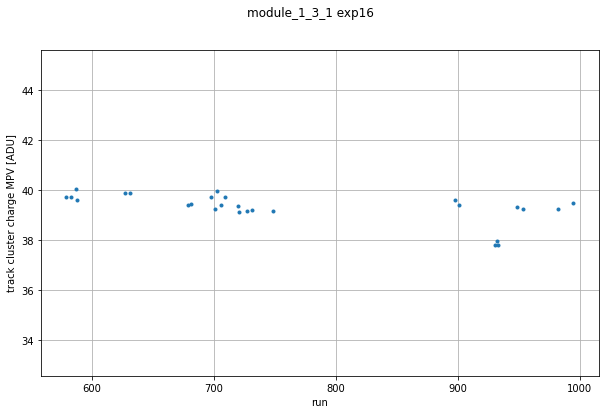

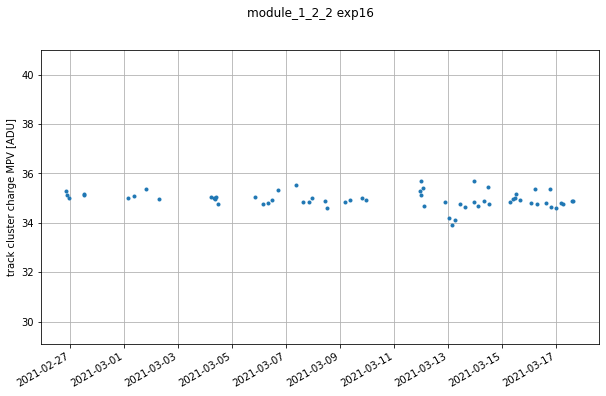

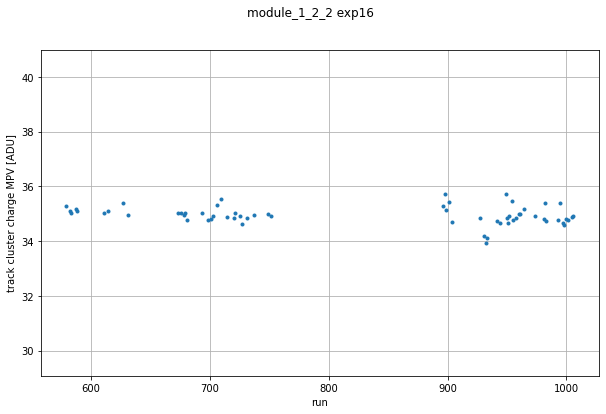

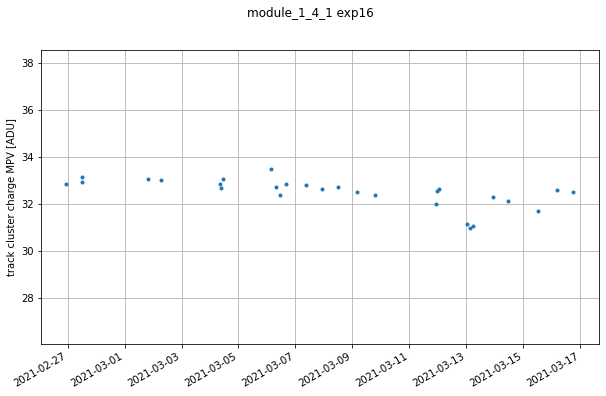

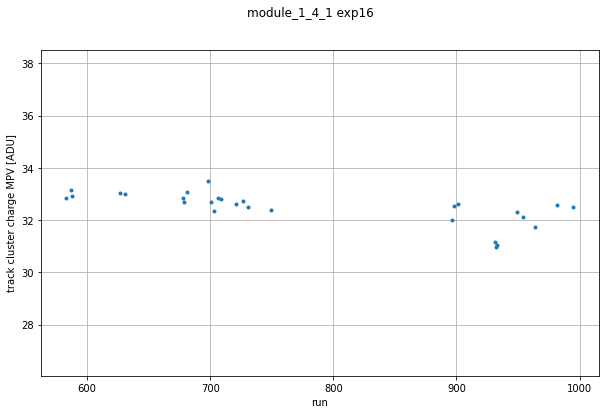

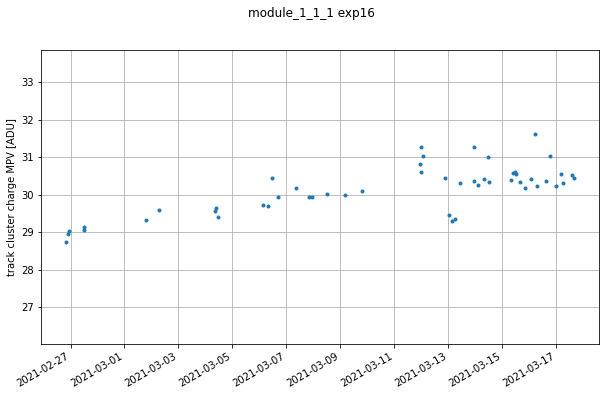

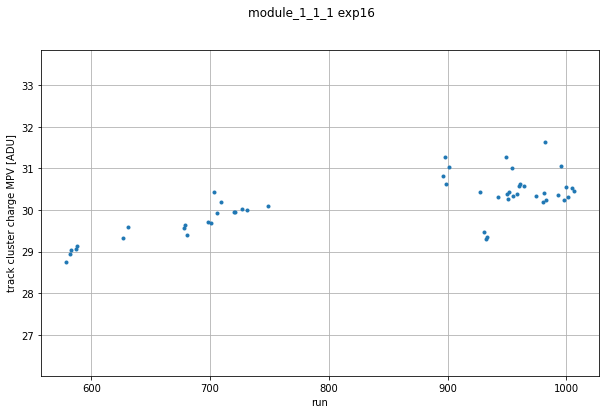

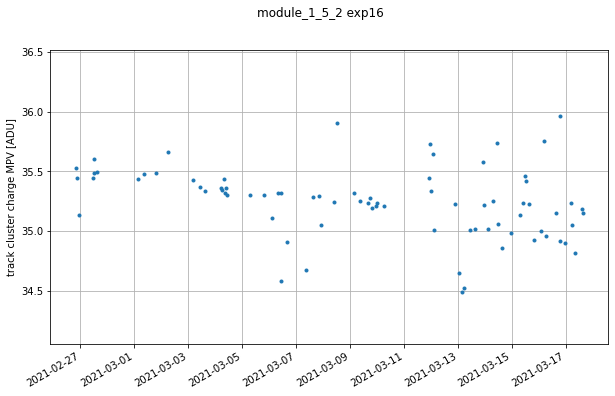

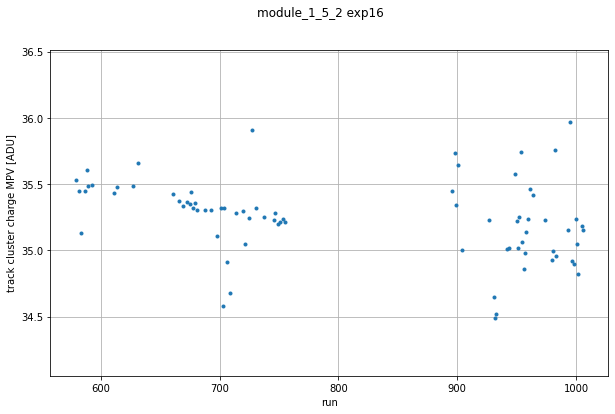

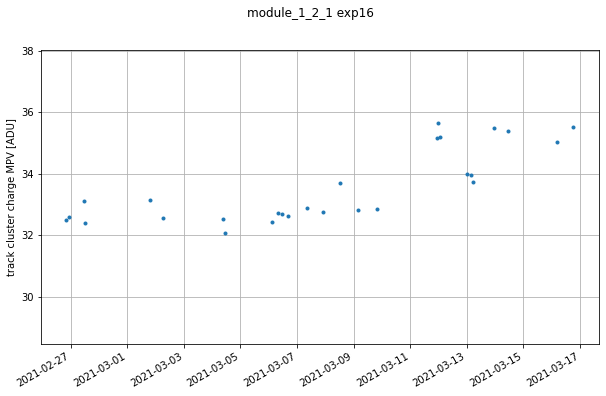

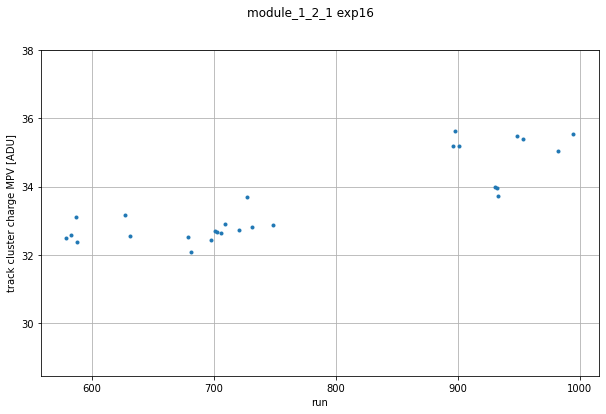

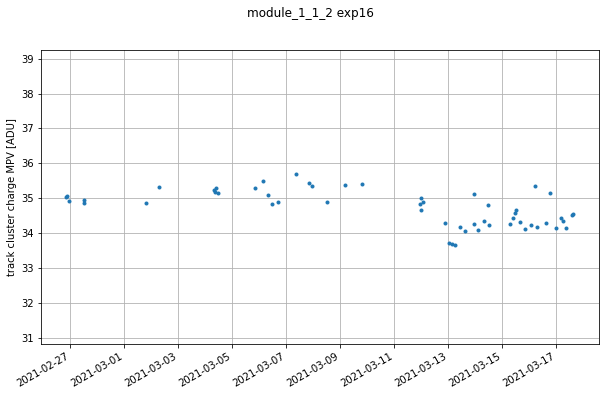

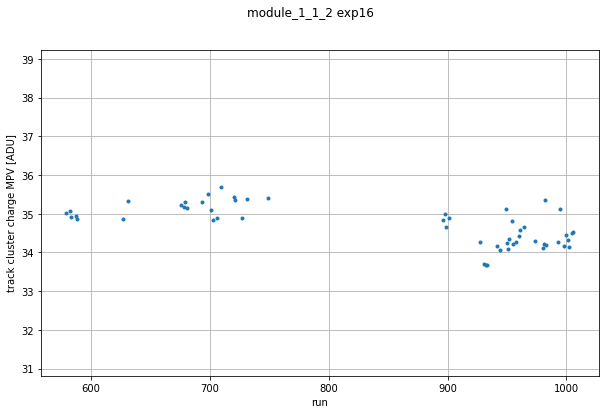

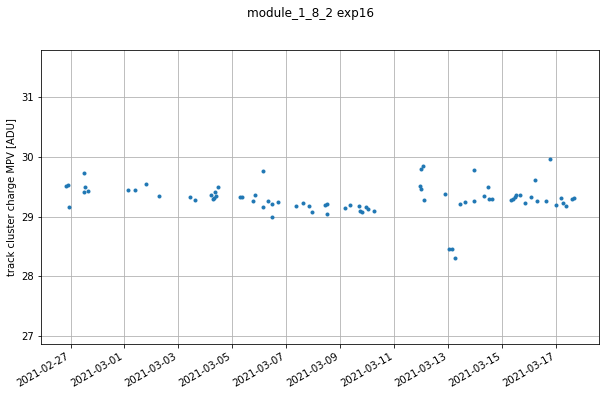

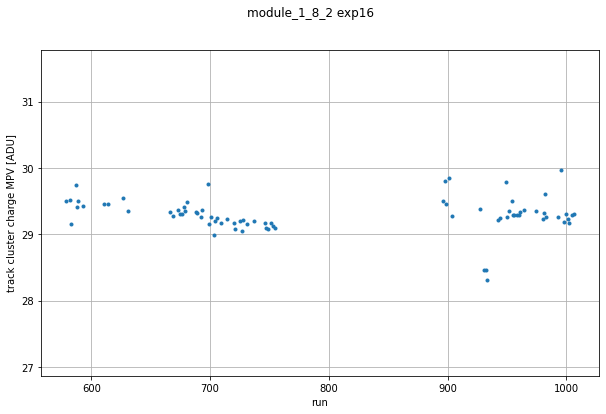

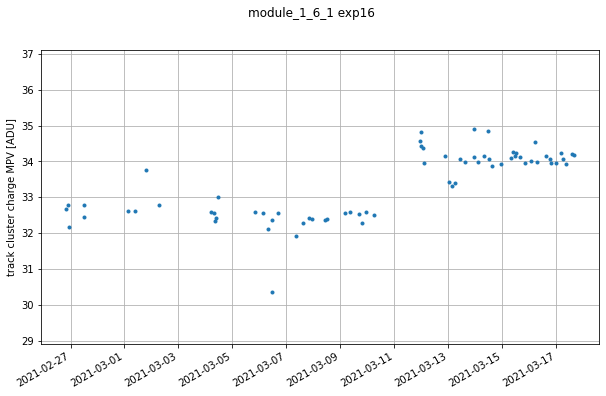

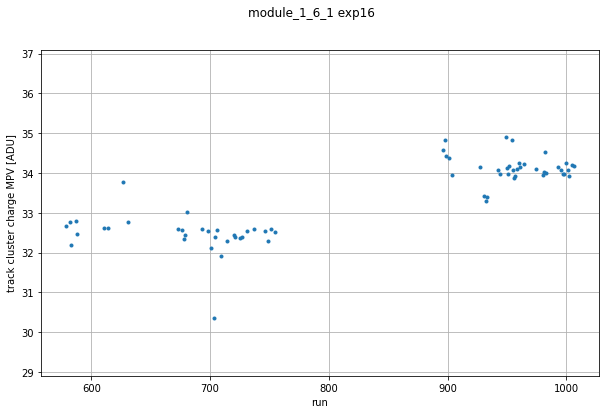

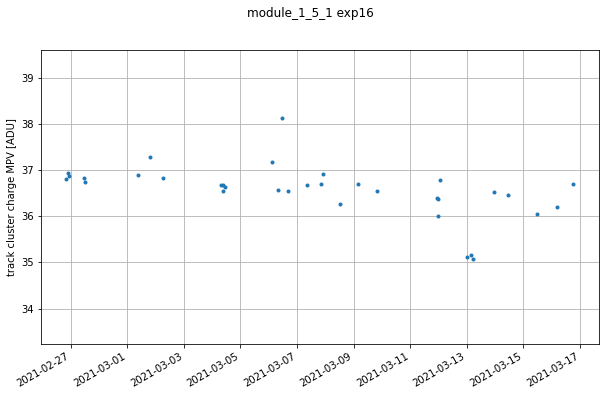

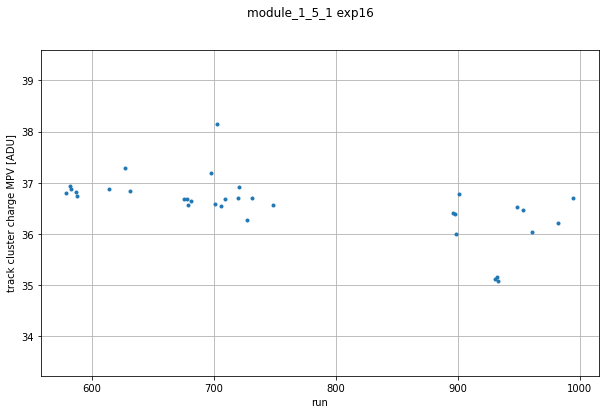

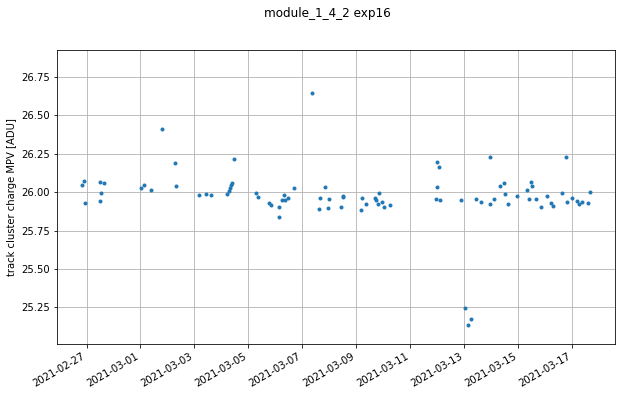

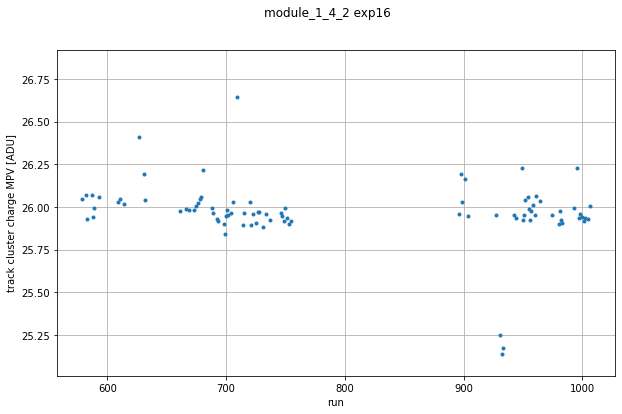

In [39]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdate
import datetime
from matplotlib import pyplot as plt
from os.path import isfile, join
from os import listdir
from glob import glob
import re
import ROOT

expnr = 16

savefigs = False
fitres_path = 'dqm.belle2.org/past_runs/expreco_exp%i_canvas'%expnr

run_info = np.load('../exp%i_run_time_info.npy'%expnr,allow_pickle=True).item()

histnames = {'trackcharge_15': 'PXDER/PXD_Track_Cluster_Charge_1_8_1', 'trackcharge_13': 'PXDER/PXD_Track_Cluster_Charge_1_7_1', 
         'trackcharge_14': 'PXDER/PXD_Track_Cluster_Charge_1_7_2', 'trackcharge_20': 'PXDER/PXD_Track_Cluster_Charge_2_5_2', 
         'trackcharge_19': 'PXDER/PXD_Track_Cluster_Charge_2_5_1', 'trackcharge_12': 'PXDER/PXD_Track_Cluster_Charge_1_6_2', 
         'trackcharge_17': 'PXDER/PXD_Track_Cluster_Charge_2_4_1', 'trackcharge_18': 'PXDER/PXD_Track_Cluster_Charge_2_4_2', 
         'trackcharge_5': 'PXDER/PXD_Track_Cluster_Charge_1_3_1', 'trackcharge_4': 'PXDER/PXD_Track_Cluster_Charge_1_2_2', 
         'trackcharge_7': 'PXDER/PXD_Track_Cluster_Charge_1_4_1', #'trackcharge_6': 'PXDER/PXD_Track_Cluster_Charge_1_3_2', 
         'trackcharge_1': 'PXDER/PXD_Track_Cluster_Charge_1_1_1', 'trackcharge_10': 'PXDER/PXD_Track_Cluster_Charge_1_5_2', 
         'trackcharge_3': 'PXDER/PXD_Track_Cluster_Charge_1_2_1', 'trackcharge_2': 'PXDER/PXD_Track_Cluster_Charge_1_1_2', 
         'trackcharge_16': 'PXDER/PXD_Track_Cluster_Charge_1_8_2', 'trackcharge_11': 'PXDER/PXD_Track_Cluster_Charge_1_6_1', 
         'trackcharge_9': 'PXDER/PXD_Track_Cluster_Charge_1_5_1', 'trackcharge_8': 'PXDER/PXD_Track_Cluster_Charge_1_4_2'}

sample_dict = {}
sample_dict['runnr'] = []
sample_dict['date'] = []
for i in histnames.keys():
    sample_dict[histnames[i]]=[]
    sample_dict['%s_chi2'%histnames[i]]=[]

for f in glob(join(fitres_path,'trackcharge_langau_*npy')):
    
    runnr = re.findall('r\d{6}', f)[0]
    runnr = int(runnr[1:])

    if runnr in run_info.keys():
        
        # get run start and start time
        try:
            t1 = datetime.datetime.strptime(run_info[runnr][1], "%Y-%m-%dT%H:%M:%S.%fZ")
        except Exception:
            t1 = datetime.datetime.strptime(run_info[runnr][1], "%Y-%m-%dT%H:%M:%SZ")
        try:
            t0 = datetime.datetime.strptime(run_info[runnr][0], "%Y-%m-%dT%H:%M:%S.%fZ")
        except Exception:
            t0 = datetime.datetime.strptime(run_info[runnr][0], "%Y-%m-%dT%H:%M:%SZ")

        ## skip the short runs. 
#         if t1 - t0 < datetime.timedelta(minutes = 5):
#             continue
        
        sample_dict['runnr'].append(int(runnr))
        sample_dict['date'].append(t0)
        
        ana = np.load(f,allow_pickle=True).item()
        for i in histnames.keys():
            sample_dict[histnames[i]].append(ana[histnames[i]][0])
            sample_dict['%s_chi2'%histnames[i]].append(ana[histnames[i]][2])

sample = pd.DataFrame(sample_dict)

color=['tab:blue','tab:red', 'forestgreen']

for i in histnames.keys():
    var = histnames[i]
    
#### only plotting cluster charge 

    mean = np.mean(sample_dict[var])
    std = np.std(sample_dict[var])
    
    subsample = sample.loc[(sample[var] > 10) & (sample[var] < 60) & (sample['%s_chi2'%var]<800)]
    print(var, len(subsample.index))
    
    fig0, ax0 = plt.subplots(figsize=(10,6))
    fig0.suptitle('module_%s exp%i'%('_'.join(var.split('_')[-3:]),expnr))
    ax0.plot_date([mdate.date2num(t) for t in subsample['date']], subsample[var],c=color[0],ls='',marker='.', label=var)
    ax0.set_ylabel('track cluster charge MPV [ADU]')
    ax0.grid()
    ax0.set_ylim(mean-5*std, mean+5*std)
    fig0.autofmt_xdate()
    if savefigs:
        plt.savefig('trackcharge_exp%i_%s_langau_date'%(expnr,'_'.join(var.split('_')[-3:])))


    fig1, ax1 = plt.subplots(figsize=(10,6))
    fig1.suptitle('module_%s exp%i'%('_'.join(var.split('_')[-3:]),expnr))
    ax1.plot(subsample['runnr'], subsample[var],c=color[0],ls='',marker='.', label=var)
    ax1.set_ylabel('track cluster charge MPV [ADU]')
    ax1.set_xlabel('run')
    ax1.grid()
    ax1.set_ylim(mean-5*std, mean+5*std)
    if savefigs:
        plt.savefig('trackcharge_exp%i_%s_langau_run'%(expnr,'_'.join(var.split('_')[-3:])))

